In [35]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("./titanic_toy.csv")

In [26]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [28]:
xTrain, xTest, yTrain, yTest = train_test_split(df.drop(columns=['Survived']), df['Survived'], train_size=0.8, random_state=42)

### So we will create two imputers using SimpleImputer() class, one with strategy of mean and another as median and then we will create a column transformer and pass the dataset completely into it

In [30]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [31]:
trf = ColumnTransformer(
    [
        ('t1', imputer1, ['Age']),
        ('t2', imputer2, ['Fare'])
    ],
    remainder='passthrough'
)

lets see the distribution before transformation

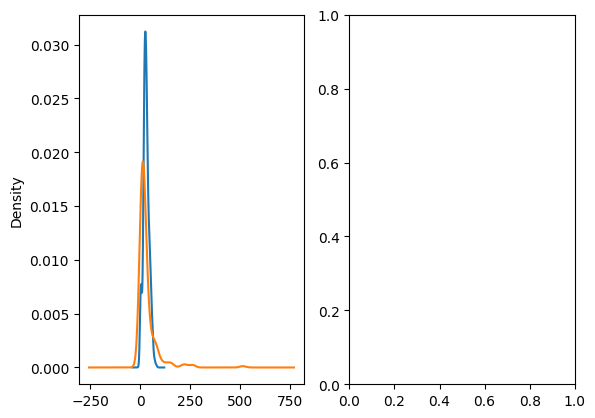

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2)
xTrain['Age'].plot(kind='kde', ax=ax1)
xTrain['Fare'].plot(kind='kde', ax=ax1)

In [41]:
xTrain = trf.fit_transform(xTrain)
xTest = trf.transform(xTest)

In [43]:
xTrain = pd.DataFrame(xTrain, columns=df.drop(columns=['Survived']).columns)

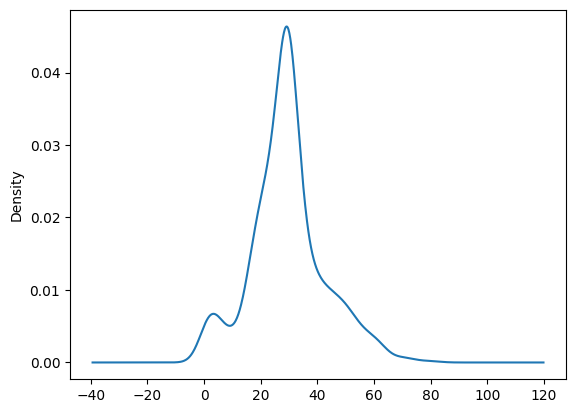

In [44]:
xTrain['Age'].plot(kind='kde')

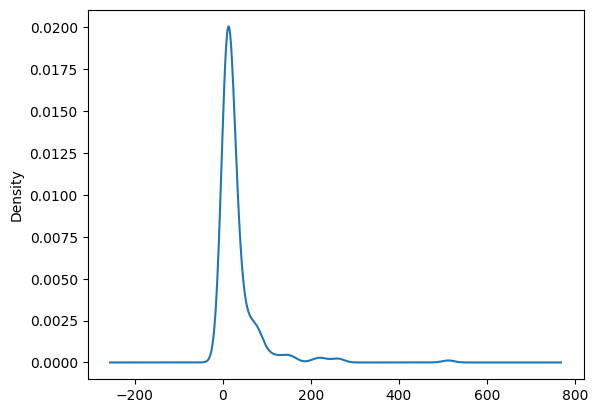

In [45]:
xTrain['Fare'].plot(kind='kde')

In the above plot before transformation, the maximum density of Age column was near 0.03, similary the maximum distribution was slightly below 0.02, but after transformation, the maximum distribution of age reaches 0.04 and that of Fare becomes slightly above 0.02